
# **Importing Libraries** 
1. numpy - for handling n-d arrays
2. pandas - for handling and importing datasets as dataframe
3. matplotlib.pyplot - to plot graphs to visualise the regression plot
4. math - for root and basic mathematical functions

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# **Reading Dataset and Clearing Small defects**

We have imported the provided 'College_Admissions.csv' dataset using the pandase method 'read_csv' and have renamed few columns to remove trailing spaces.

Printed the first five rows of the dataset for verification.

In [387]:
df = pd.read_csv('College_Admissions.csv')
df.rename(columns = {'LOR ' : 'LOR','Chance of Admit ':'Chance of Admit'}, inplace = True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Data Visualization**

To figure out which parameters/columns should be used to gain the best predictions, plots were drawn across various columns and their inter-dependencies towards the 'Chance of Admit'. From these visualizations we can come to a conclusion that 'GRE Score', 'TOEFL Score' and 'Research' play a vital role in deciding the outcome of the application. 

GRE Score


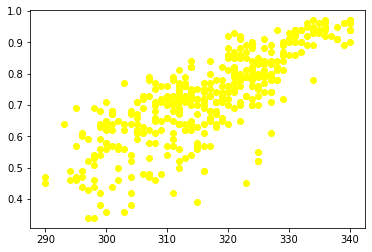

TOEFL Score


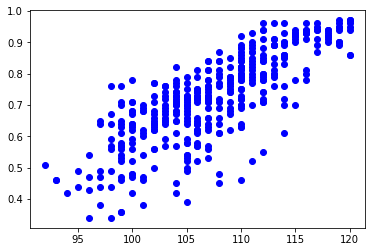

University Rating


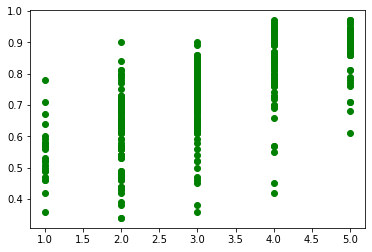

SOP


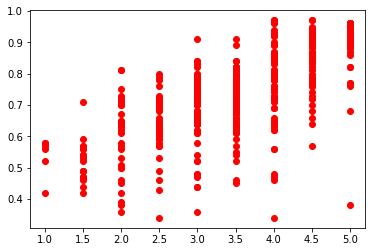

LOR


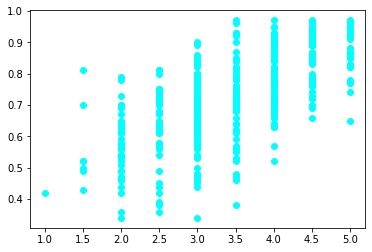

CGPA


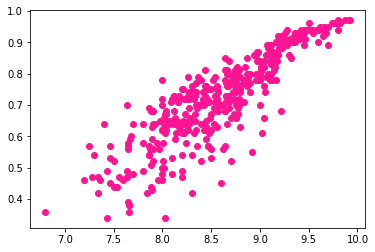

Research


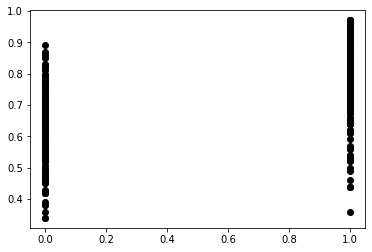

In [388]:
colors = ['yellow','blue','green','red','cyan','deeppink','black']
X = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
for X,C in zip(X, colors):
  print(X)
  if (X != 'Chance of Admit'):
    plt.scatter(df[X],df['Chance of Admit'],label = X,c = C)
    plt.show()

# **Manipulating Dataset**

The dataset has been changed to suite our needs since we dont need all of the columns to predict the chances. Since, we are going to use the above three mentioned columns we can drop the other three from dataset. Also, we divide the dataset into features data and label data.

In [389]:
X = df.drop('Chance of Admit',axis = 1)
X = X.drop(labels=['LOR','SOP','University Rating','Serial No.'],axis = 1)
y = df['Chance of Admit']
X.head()

,GRE Score,TOEFL Score,CGPA,Research
0,337,118,9.65,1
1,324,107,8.87,1
2,316,104,8.00,1
3,322,110,8.67,1
4,314,103,8.21,0


# **Splitting the Training and Test dataset**

As mentioned in the specifications of this project, using train_test_split the modified dataset has been split into 20 % test data and 80 % training data.

In [390]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 2)
pd.DataFrame(y_test).to_csv('Actuals.csv')

# **Linear Regression**

Performing linear regression on the model using sklearn.linear_model. Trained the model X_train, y_train and predicted the values. The predicted values are stored in 'LR_Predictions.csv'. Also, computed the  mean square error for this model.

In [391]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression().fit(X_train,y_train)
regressor.score(X_train,y_train)
preds = regressor.predict(X_test)
pd.DataFrame(preds).to_csv('LR_Predictions.csv')
mse_lr = mean_squared_error(y_test,preds)
mse_lr_train = mean_squared_error(y_train,regressor.predict(X_train))

# **Support Vector Regression**
Performing support vector regression on the model using sklearn.svm. Trained the model X_train, y_train and predicted the values. The predicted values are stored in 'SVR_Predictions.csv'. Also, computed the  mean square error for this model.

In [392]:
from sklearn.svm import SVR
s = SVR()
s.fit(X_train,y_train)
preds1 = s.predict(X_test)
pd.DataFrame(preds1).to_csv('SVR_Predictions.csv')
mse_svr = mean_squared_error(y_test,preds1)
mse_svr_train = mean_squared_error(y_train,s.predict(X_train))

# **Applying PCA Decomposition on the Dataset**

Using the decomposition module of Sklearn, the dataset was decomposed into 2-D using PCA.

In [393]:
from sklearn.decomposition import PCA
X = df.drop(columns=['Chance of Admit','Serial No.'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 2)
pca = PCA(n_components=2)
PC = pca.fit_transform(X_train)
PC_test = pca.transform(X_test)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


# **Applying Linear Regression after PCA decomposition**

Trained the model again using linear regression on the 2-dimensional dataset, and predicted the values into 'LR_PCA_Predictions.csv'.

In [394]:
regressor_PCA = LinearRegression().fit(PC,y_train)
preds_PCA = regressor_PCA.predict(PC_test)
pd.DataFrame(preds_PCA).to_csv('LR_PCA_Predictions.csv')
mse_lr_pca = mean_squared_error(y_test,preds_PCA)
mse_lr_pca_train = mean_squared_error(y_train,regressor_PCA.predict(PC))
preds1 = regressor_PCA.coef_[0] * PC[:,:-1] + regressor_PCA.coef_[1] * PC[:,-1:] + regressor_PCA.intercept_

# **Plotting the Data Points and the Regression Line**

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


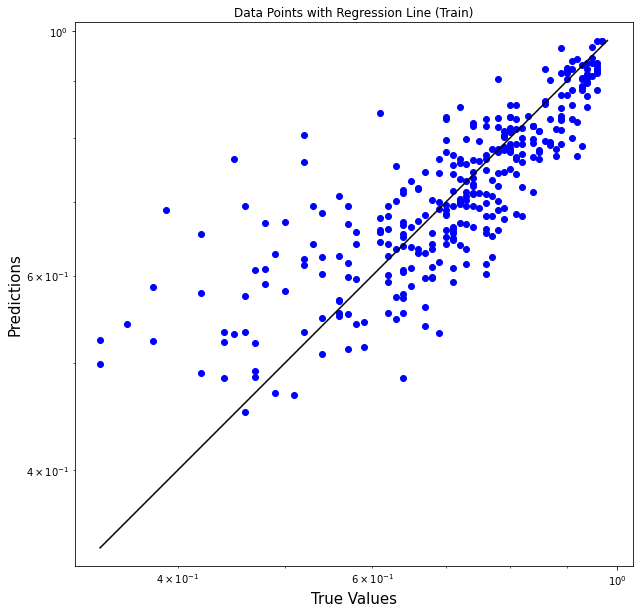

In [395]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(y_train,preds1,c = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.title('Data Points with Regression Line (Train)')
p1 = max(max(preds1), max(y_train))
p2 = min(min(preds1), min(y_train))
plt.plot([p1,p2],[p1,p2],c = 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

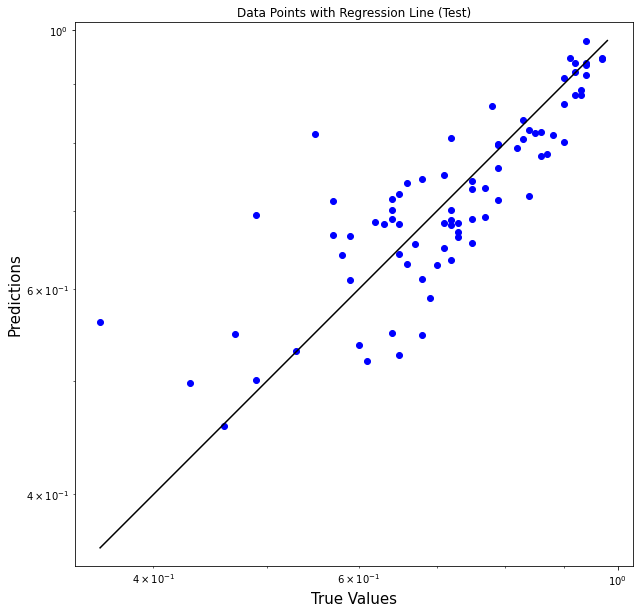

In [396]:
plt.figure(figsize = (10,10))
plt.scatter(y_test,preds_PCA,c = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.title('Data Points with Regression Line (Test)')
p1 = max(max(preds_PCA), max(y_test))
p2 = min(min(preds_PCA), min(y_test))
plt.plot([p1,p2],[p1,p2],c = 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# **Applying Support Vector Regression after PCA decomposition**

Trained the model again using support vector regression on the 2-dimensional dataset, and predicted the values into 'LR_PCA_Predictions.csv'.

In [397]:
svr_pca = SVR().fit(PC,y_train)
predssvr = svr_pca.predict(PC_test)
pd.DataFrame(predssvr).to_csv('SVR_PCA_Predictions.csv')
mse_svr_pca = mean_squared_error(y_test,predssvr)
mse_svr_pca_train = mean_squared_error(y_train,svr_pca.predict(PC))
svr_pca.n_support_

array([66], dtype=int32)

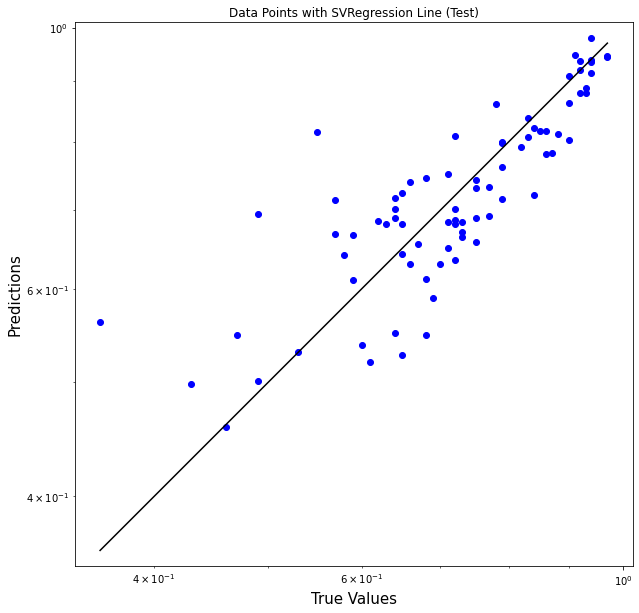

In [398]:
plt.figure(figsize = (10,10))
plt.scatter(y_test,preds_PCA,c = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.title('Data Points with SVRegression Line (Test)')
p1 = max(max(predssvr), max(y_test))
p2 = min(min(predssvr), min(y_test))
plt.plot([p1,p2],[p1,p2],c = 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [399]:
print(f'''The MSEs are as follows: \n Test Data\n Linear Regression: {mse_lr} \n Support Vector Regression: {mse_svr} \n\n\n Post-PCA Reductions \n\n\n Linear Regression: {mse_lr_pca} \n Support Vector Regression: {mse_svr_pca}  
\n\n\n\n Train Data\n Linear Regression: {mse_lr_train} \n Support Vector Regression: {mse_svr_train} \n\n\n Post-PCA Reductions \n\n\n Linear Regression: {mse_lr_pca_train} \n Support Vector Regression: {mse_svr_pca_train}''')

The MSEs are as follows: 
 Test Data
 Linear Regression: 0.004407501201662995 
 Support Vector Regression: 0.006406796145664429 


 Post-PCA Reductions 


 Linear Regression: 0.005502055815672263 
 Support Vector Regression: 0.005967560599657846  




 Train Data
 Linear Regression: 0.0041953722015910366 
 Support Vector Regression: 0.007134447130788829 


 Post-PCA Reductions 


 Linear Regression: 0.006287904779785728 
 Support Vector Regression: 0.006638079750866488


# **Conclusions**

**Linear Regression**

As we can notice that the Linear Regression (over selected features) performs best as we had selected the most important values needed for prediction and hence it gave us the least error without dimensional reduction. Even after PCA reduction it wasn't able to provide a better prediction since the reduction leads to some loss of data which could have caused this change in error.

**Support Vector Regression**

In contrast, SVR works better after PCA reduction because unlike linear regression which tries to fit a best line in the scatter plot, SVR fits a line within a threshold of values (decision boundaries). So, dimensional reduction helps the model to tighten those boundaries better with more additional information (features).